In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline


#### Чтение данных из файла

In [4]:
df= pd.read_csv('Test.csv', index_col='id') # Можно изменить файл

#### Статическая информация по используемым данным

In [5]:
df.describe()

,X,y
count,11.000000,11.000000
mean,3.181818,15.818182
std,1.662419,2.993933
min,1.000000,11.000000
25%,2.000000,13.500000
50%,3.000000,17.000000
75%,4.500000,18.000000
max,6.000000,20.000000


#### Выбор x и y и изображение исходных точек

<Axes: xlabel='y', ylabel='X'>

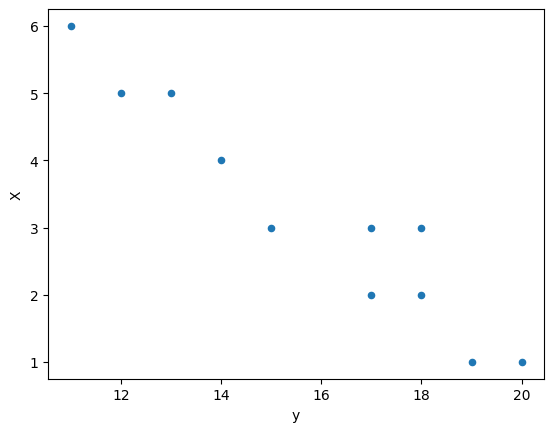

In [9]:
x_col='y'
y_col='X'

df.plot(x=x_col,y=y_col,kind='scatter')

#### Нахождение параметров регрессионной прямой y=ax+b методом наименьших квадратов

In [10]:
X = np.array([np.ones(len(df)),df[x_col]]).T
y = np.array(df[y_col]).T
X_T_X_inv = np.linalg.inv(X.T.dot(X))
B = X_T_X_inv.dot(X.T.dot(y))
print(f'a = {B[1]}, b = {B[0]}') 

a = -0.5314401622718031, b = 11.588235294117615


In [11]:
df['y_pred']=df[x_col]*B[1]+B[0]
df

,X,y,y_pred
id,,,
0,1,20,0.959432
1,2,17,2.553753
2,3,17,2.553753
3,4,14,4.148073
4,5,12,5.210953
5,6,11,5.742394
6,5,13,4.679513
7,3,15,3.616633
8,2,18,2.022312


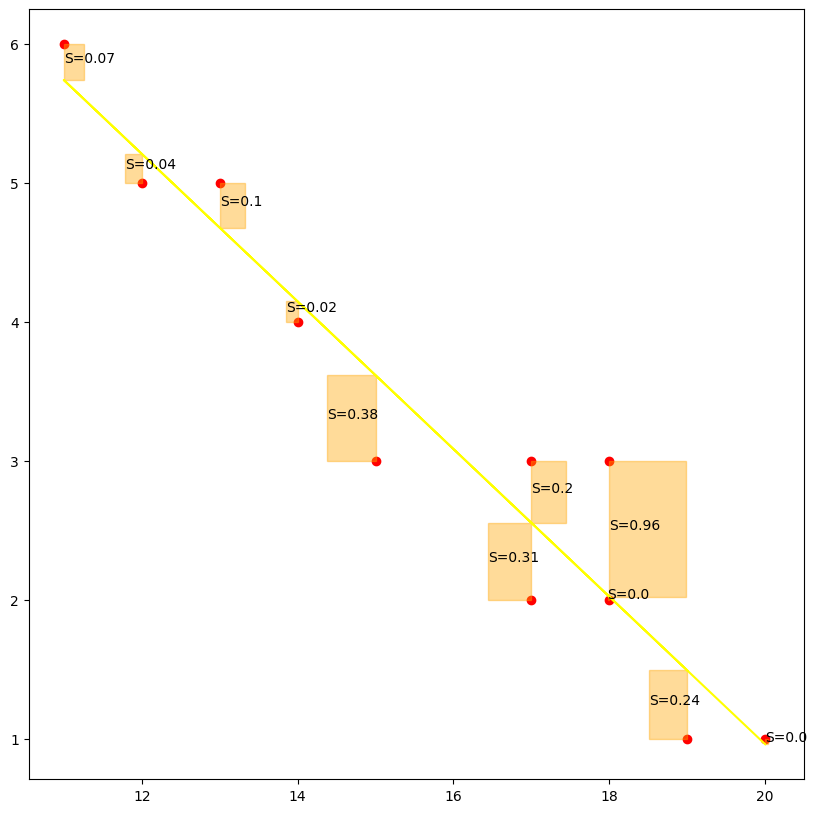

In [14]:
fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(df[x_col] ,df[y_col],color='red')
ax.plot(df[x_col],df.y_pred,'yellow')
if B[1]>=0:
    for res in df.index:
        start = (df.loc[res,x_col],df.loc[res,y_col])
        side_length=df.loc[res,y_col]-df.loc[res].y_pred
        ax.add_patch(Rectangle(start, -side_length, -side_length,fill=True,alpha=0.4,color='orange'))
        if side_length>0:
            ax.text(start[0]-side_length,start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
        else:
            ax.text(start[0],start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
else:
    for res in df.index:
        start = (df.loc[res,x_col],df.loc[res,y_col])
        side_length=df.loc[res,y_col]-df.loc[res].y_pred
        ax.add_patch(Rectangle(start, side_length, -side_length,fill=True,alpha=0.4,color='orange'))
        if side_length>0:
            ax.text(start[0],start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
        else:
            ax.text(start[0]+side_length,start[1]-side_length/2,f"S={round(side_length*side_length,2)}")
plt.show()